In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, utils
import matplotlib.pyplot as plt

C:\Users\Bipin Krishnan P\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
num_words = 10000

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.imdb.load_data(maxlen=500, num_words=num_words)

In [4]:
train_x.shape

(25000,)

In [5]:
def ohe_reviews(data, num_words=num_words):
    '''
    converts all data to 1 at the respective 
    position within the total possible num_words 
    Example:
      one hot encoding for [2, 4, 6, 9] is 
             [0, 1, 0, 1, 0, 1, 0, 0, 1, 0] 
             
                 where num_words=10
        
    '''
    data_ohe = np.zeros((len(data), num_words))
    for i, sequence in enumerate(data):
        data_ohe[i, sequence] = 1
        
    return data_ohe 

In [6]:
train_x_ohe = ohe_reviews(train_x)
test_x_ohe = ohe_reviews(test_x)

In [7]:
print(test_x_ohe[1][1:50])
print(test_x_ohe[0][1:50])

[1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0.]
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1.]


In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(400, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [10]:
model.fit(train_x_ohe, train_y, epochs=5)

Epoch 1/5
25000/25000 [==============================] - 287s 11ms/step - loss: 0.3338 - acc: 0.8644
Epoch 2/5
25000/25000 [==============================] - 159s 6ms/step - loss: 0.2273 - acc: 0.9155
Epoch 3/5
25000/25000 [==============================] - 67s 3ms/step - loss: 0.1898 - acc: 0.9316
Epoch 4/5
25000/25000 [==============================] - 68s 3ms/step - loss: 0.1654 - acc: 0.9448
Epoch 5/5
25000/25000 [==============================] - 67s 3ms/step - loss: 0.1390 - acc: 0.9557


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               3000300   
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               120400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 3,121,101
Trainable params: 3,121,101
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.history.history

{'loss': [0.3337988516139984,
  0.22733565807819367,
  0.18979974027633667,
  0.1654308225697279,
  0.13897041129142046],
 'acc': [0.86436, 0.91552, 0.93156, 0.9448, 0.95572]}

In [13]:
losses = model.history.history['loss']
acc = model.history.history['acc']

epoch = []
for i in range(5):
    epoch.append(i+1)

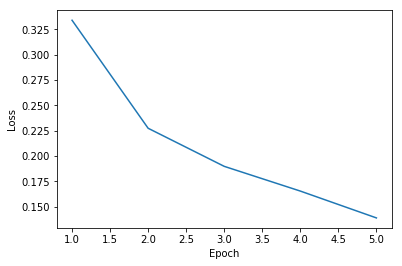

In [16]:
plt.plot(epoch, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

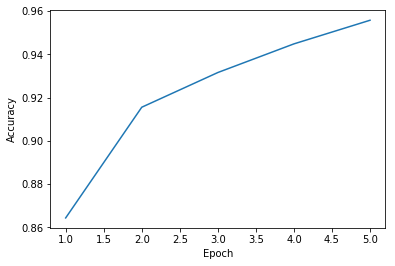

In [17]:
plt.plot(epoch, acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [18]:
model.evaluate(test_x_ohe, test_y)

20947/20947 [==============================] - 208s 10ms/step


[0.47401438465879636, 0.8815104788531265]

In [19]:
pred = model.predict(test_x_ohe)

In [21]:
pred[0:20]

array([[5.5184208e-02],
       [1.4981570e-02],
       [9.7005063e-01],
       [9.9992406e-01],
       [9.9725598e-01],
       [9.9999392e-01],
       [1.0000000e+00],
       [5.0174943e-03],
       [9.8852557e-01],
       [7.2613835e-02],
       [9.9992692e-01],
       [9.9999189e-01],
       [1.0416382e-22],
       [9.9729830e-01],
       [7.7727574e-01],
       [9.9999559e-01],
       [1.7808832e-01],
       [4.9468629e-25],
       [1.8060706e-04],
       [9.7173655e-01]], dtype=float32)

In [28]:
def prediction(data):
    row = data.shape[1]
    col = data.shape[0]
    return np.reshape(np.round(data), (row,col))

In [29]:
print("Predicted output", prediction(pred[0:10]))
print("\nOriginal output", test_y[0:10])

Predicted output [[0. 0. 1. 1. 1. 1. 1. 0. 1. 0.]]

Original output [0 0 1 1 1 1 1 0 1 0]
